In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
sales = pd.read_csv('combined.csv')

In [3]:
sales = sales[sales['month'] >= '2016-01']

In [4]:
sales.head()

,month,sales
24,2016-01,32759506.12
25,2016-02,39785722.81
26,2016-03,50276824.29
27,2016-04,26237321.88
28,2016-05,30250499.14


In [5]:
sales.head()

,month,sales
24,2016-01,32759506.12
25,2016-02,39785722.81
26,2016-03,50276824.29
27,2016-04,26237321.88
28,2016-05,30250499.14


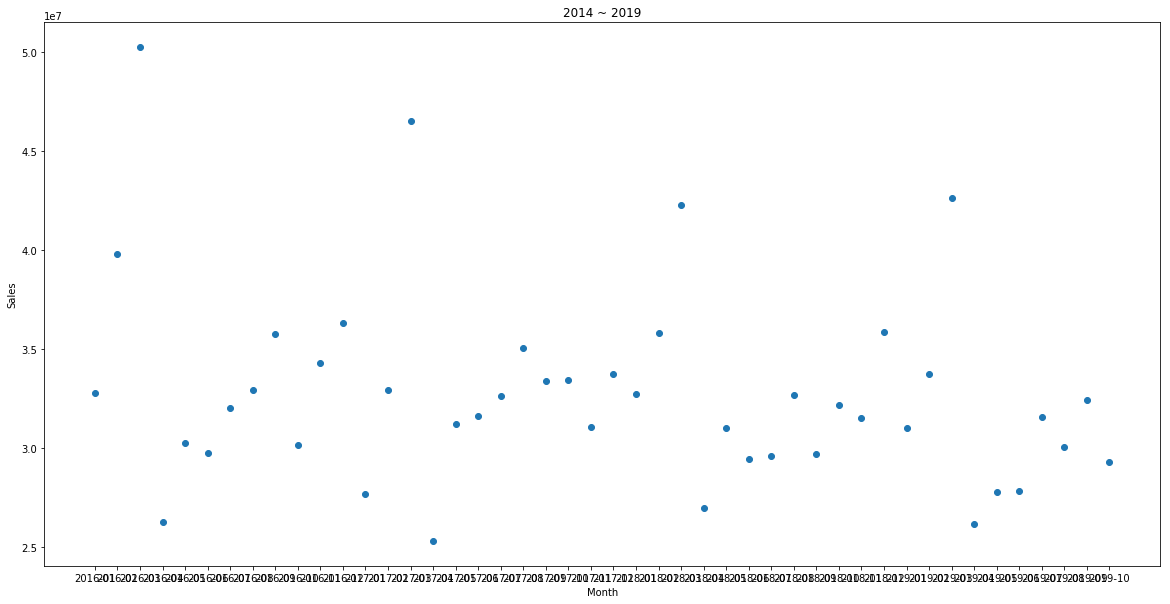

In [6]:
plt.figure(figsize=(20, 10))
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title("2014 ~ 2019")
plt.scatter(sales['month'], sales['sales'])
plt.show()

In [7]:
def yearmonth_to_num(year_month):
    start_year = 2008
    year, month = year_month.split('-')
    index = (int(year) - start_year) * 12 + (int(month) - 1)
    return index
    

In [8]:
yearmonth_to_num("2019-02")

133

In [9]:
yearmonth_index = [yearmonth_to_num(m) for m in sales['month']]

In [10]:
sales['yearmonth_index'] = yearmonth_index

In [11]:
sales.head()

,month,sales,yearmonth_index
24,2016-01,32759506.12,96
25,2016-02,39785722.81,97
26,2016-03,50276824.29,98
27,2016-04,26237321.88,99
28,2016-05,30250499.14,100


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
sales.values

array([['2016-01', 32759506.12, 96],
       ['2016-02', 39785722.81, 97],
       ['2016-03', 50276824.29, 98],
       ['2016-04', 26237321.88, 99],
       ['2016-05', 30250499.14, 100],
       ['2016-06', 29749449.46, 101],
       ['2016-07', 32025318.8, 102],
       ['2016-08', 32941641.3, 103],
       ['2016-09', 35748878.52, 104],
       ['2016-10', 30164746.83, 105],
       ['2016-11', 34274031.26, 106],
       ['2016-12', 36338915.55, 107],
       ['2017-01', 27674972.18, 108],
       ['2017-02', 32944442.35, 109],
       ['2017-03', 46506448.47, 110],
       ['2017-04', 25293815.1, 111],
       ['2017-05', 31236282.5, 112],
       ['2017-06', 31634984.95, 113],
       ['2017-07', 32639539.85, 114],
       ['2017-08', 35068387.0, 115],
       ['2017-09', 33388983.08, 116],
       ['2017-10', 33412599.99, 117],
       ['2017-11', 31052163.06, 118],
       ['2017-12', 33745391.2, 119],
       ['2018-01', 32715036.21, 120],
       ['2018-02', 35836815.97, 121],
       ['2018-03', 423

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sales['yearmonth_index'].values.reshape(-1,1), sales['sales'].values.reshape(-1,1), test_size=0.1)

In [15]:
X_train.shape

(41, 1)

In [16]:
y_train.shape

(41, 1)

In [17]:
X_test

array([[107],
       [ 97],
       [109],
       [130],
       [105]])

In [18]:
y_test

array([[36338915.55],
       [39785722.81],
       [32944442.35],
       [31534181.62],
       [30164746.83]])

In [19]:
reg = LinearRegression().fit(X_train,  y_train)

In [20]:
reg.score(X_train,y_train)

0.036916370409926125

In [21]:
reg.coef_

array([[-74192.20665309]])

In [22]:
reg.intercept_

array([41473593.97146581])

In [23]:
print(y_test)

[[36338915.55]
 [39785722.81]
 [32944442.35]
 [31534181.62]
 [30164746.83]]


In [24]:
predicts = reg.predict(X_test)

In [25]:
overall_diff_perc = 0

In [26]:
for y, y_hat in zip(y_test, predicts):
    overall_diff_perc += abs(y-y_hat)/y
    print("Sales: {}, Predicted Sales: {}, Diff: {}, Diff Percent: {}".format(y, y_hat, abs(y-y_hat), abs(y-y_hat)/y))
print("average diff percent: ", overall_diff_perc/len(y_test))

Sales: [36338915.55], Predicted Sales: [33535027.85958523], Diff: [2803887.69041477], Diff Percent: [0.07715937]
Sales: [39785722.81], Predicted Sales: [34276949.92611612], Diff: [5508772.88388388], Diff Percent: [0.13846105]
Sales: [32944442.35], Predicted Sales: [33386643.44627905], Diff: [442201.09627904], Diff Percent: [0.01342263]
Sales: [31534181.62], Predicted Sales: [31828607.10656416], Diff: [294425.48656416], Diff Percent: [0.00933671]
Sales: [30164746.83], Predicted Sales: [33683412.2728914], Diff: [3518665.4428914], Diff Percent: [0.11664827]
average diff percent:  [0.0710056]


In [27]:
reg.predict(np.array([142]).reshape(-1,1))

array([[30938300.62672709]])

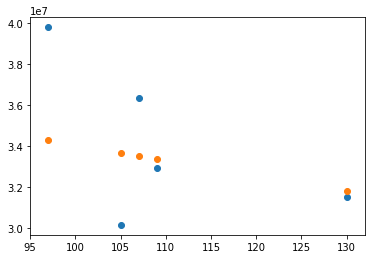

In [28]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)

## train model with lastest 12 months data

In [29]:
len(X_test)

5

In [30]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [31]:
mask = (sales.month <= prev_month) & (sales.month >= last_year_pre_month)

In [32]:
last_one_year_sales = sales[mask]

In [33]:
X_train_12 = last_one_year_sales.yearmonth_index.values.reshape(-1,1)
y_train_12 = last_one_year_sales.sales.values.reshape(-1,1)

In [34]:
reg_last_one_year = LinearRegression().fit(X_train_12, y_train_12)

In [35]:
reg_last_one_year.coef_

array([[-100227.5171978]])

In [36]:
reg_last_one_year.predict(np.array([142]).reshape(-1,1))

array([[30708590.01032967]])

In [37]:
prev_month = '2019-07'
last_year_pre_month = '2018-07'

In [38]:
predicts_12 = reg_last_one_year.predict(X_test)

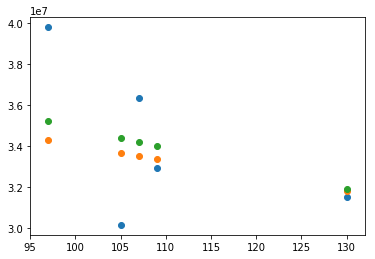

In [39]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predicts)
plt.scatter(X_test, predicts_12)

In [40]:
predicts

array([[33535027.85958523],
       [34276949.92611612],
       [33386643.44627905],
       [31828607.10656416],
       [33683412.2728914 ]])

In [41]:
predicts_12

array([[34216553.11225275],
       [35218828.28423077],
       [34016098.07785714],
       [31911320.2167033 ],
       [34417008.14664835]])

In [42]:
sales[sales['month']=='2019-08']

,month,sales,yearmonth_index
67,2019-08,30069055.14,139


In [43]:
sales[sales['month']=='2019-09']

,month,sales,yearmonth_index
68,2019-09,32447605.4,140


In [44]:
yearmonth_to_num('2019-08')

139

In [45]:
p1 = reg_last_one_year.predict(np.array([139, 140]).reshape(-1,1))

In [46]:
p2 = reg.predict(np.array([139, 140]).reshape(-1,1))

In [47]:
(p1 + p2) /2

array([[31085074.90430472],
       [30997865.04237927]])

In [48]:
def predict_all(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [49]:
def predict_12(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    return p.flatten()

In [50]:
def predict_avg(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    p1 = reg_last_one_year.predict(np.array([year_month_index]).reshape(-1,1))
    p2 = reg.predict(np.array([year_month_index]).reshape(-1,1))
    avg = (p1.flatten() + p2.flatten()) / 2
    return avg

In [51]:
predict_avg(['2019-09','2019-10'])

array([30997865.04237927, 30910655.18045383])

In [52]:
len(sales['sales'].values)

46

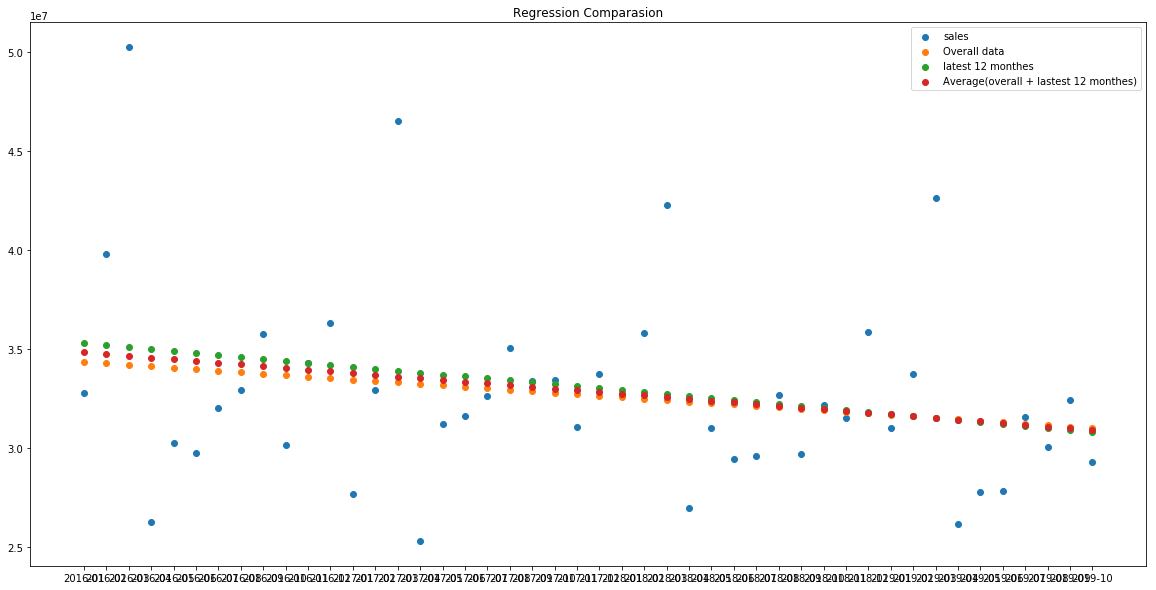

In [53]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])
plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
plt.legend()

## prediction with optimized train set

In [54]:
X_train, X_test, y_train, y_test

(array([[136],
        [126],
        [117],
        [128],
        [133],
        [103],
        [104],
        [138],
        [119],
        [127],
        [ 96],
        [114],
        [113],
        [118],
        [116],
        [121],
        [101],
        [125],
        [129],
        [102],
        [106],
        [ 98],
        [140],
        [100],
        [135],
        [112],
        [124],
        [134],
        [131],
        [ 99],
        [115],
        [141],
        [108],
        [110],
        [137],
        [122],
        [120],
        [111],
        [123],
        [139],
        [132]]), array([[107],
        [ 97],
        [109],
        [130],
        [105]]), array([[27770592.29],
        [29607438.19],
        [33412599.99],
        [29689334.78],
        [33741300.04],
        [32941641.3 ],
        [35748878.52],
        [31583768.66],
        [33745391.2 ],
        [32669211.58],
        [32759506.12],
        [32639539.85],
        [31634984.95],
        [

In [55]:
twisted_param = np.sqrt(X_train)

In [56]:
twisted_param1 =  np.sqrt(twisted_param)

In [57]:
X_train_optimal = np.append(X_train, twisted_param, axis=1)

In [58]:
#X_train_optimal = np.append(X_train, twisted_param1, axis=1)

In [59]:
Reg_optimal = LinearRegression().fit(X_train_optimal, y_train)

In [60]:
def predict_optimal(year_month):
    year_month_index = [yearmonth_to_num(ym) for ym in year_month]
    year_month_index = np.array(year_month_index).reshape(-1,1)
    year_month_index_twisted = np.log(year_month_index);
    #year_month_index_twisted1 = np.sqrt(year_month_index_twisted);
    year_month_optimal = np.append(year_month_index, year_month_index_twisted, axis=1)
    #year_month_optimal = np.append(year_month_index, year_month_index_twisted1, axis=1)
    p = Reg_optimal.predict(year_month_optimal)
    return p.flatten()
    

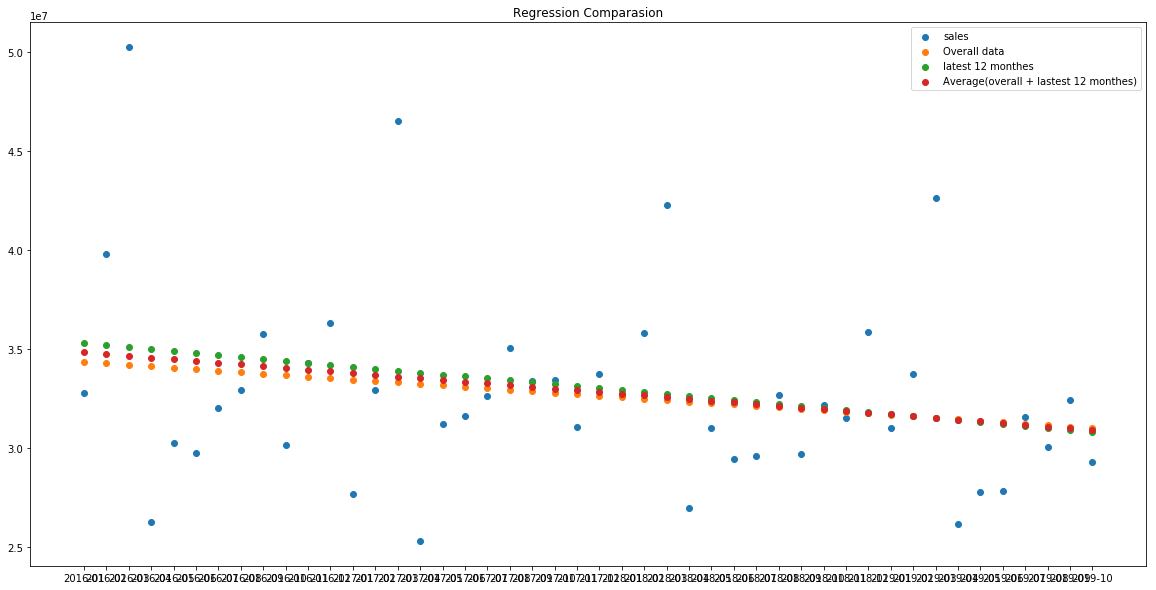

In [61]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])
plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
#plt.scatter(sales['month'], predict_optimal(sales['month'].values), label="Average(overall) Optimal")
plt.legend()

## Use year and month params

In [62]:
def make_params(year_months):
    params = [ym.split('-') for ym in year_months]
    years = [int(ym[0]) for ym in params ]
    months = [int(ym[1]) for ym in params ]
    return years, months

In [63]:
years, months = make_params(sales['month'])

In [64]:
sales['y'] = years
sales['m'] = months

In [65]:
X_train, X_test, y_train, y_test = train_test_split(sales, sales['sales'].values.reshape(-1,1), test_size=0.3)

In [66]:
X_train_new = X_train.filter(['y', 'm'], axis=1).values
X_test_new =  X_test.filter(['y','m'], axis=1).values

In [67]:
X_train_new1 = np.append(X_train_new, np.sqrt(X_train.filter(['y']).values), axis=1)

In [87]:
X_train_new

array([[2016,    1],
       [2016,    2],
       [2016,    3],
       [2016,    4],
       [2016,    5],
       [2016,    6],
       [2016,    7],
       [2016,    8],
       [2016,    9],
       [2016,   10],
       [2016,   11],
       [2016,   12],
       [2017,    1],
       [2017,    2],
       [2017,    3],
       [2017,    4],
       [2017,    5],
       [2017,    6],
       [2017,    7],
       [2017,    8],
       [2017,    9],
       [2017,   10],
       [2017,   11],
       [2017,   12],
       [2018,    1],
       [2018,    2],
       [2018,    3],
       [2018,    4],
       [2018,    5],
       [2018,    6],
       [2018,    7],
       [2018,    8],
       [2018,    9],
       [2018,   10],
       [2018,   11],
       [2018,   12],
       [2019,    1],
       [2019,    2],
       [2019,    3],
       [2019,    4],
       [2019,    5],
       [2019,    6],
       [2019,    7],
       [2019,    8],
       [2019,    9],
       [2019,   10]])

In [68]:
X_train_new1  = np.append(X_train_new, np.sqrt(X_train.filter(['y']).values), axis=1)

In [69]:
Reg_params = LinearRegression().fit(X_train_new1, y_train)

In [70]:
def predict_params(sales):

    X_train_new = sales.filter(['y', 'm'], axis=1).values
    X_params_all = np.append(X_train_new, np.sqrt(sales.filter(['y']).values), axis=1)
    p = Reg_params.predict(X_params_all)
    return p.flatten()
    

In [71]:
X_train_new = sales.filter(['y', 'm'], axis=1).values
np.append(X_train_new, np.sqrt(sales.filter(['y']).values), axis=1)


array([[2.01600000e+03, 1.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 2.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 3.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 4.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 5.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 6.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 7.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 8.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 9.00000000e+00, 4.48998886e+01],
       [2.01600000e+03, 1.00000000e+01, 4.48998886e+01],
       [2.01600000e+03, 1.10000000e+01, 4.48998886e+01],
       [2.01600000e+03, 1.20000000e+01, 4.48998886e+01],
       [2.01700000e+03, 1.00000000e+00, 4.49110231e+01],
       [2.01700000e+03, 2.00000000e+00, 4.49110231e+01],
       [2.01700000e+03, 3.00000000e+00, 4.49110231e+01],
       [2.01700000e+03, 4.00000000e+00, 4.49110231e+01],
       [2.01700000e+03, 5.00000000e+00, 4.49110231e+01],
       [2.01700000e+03, 6.00000

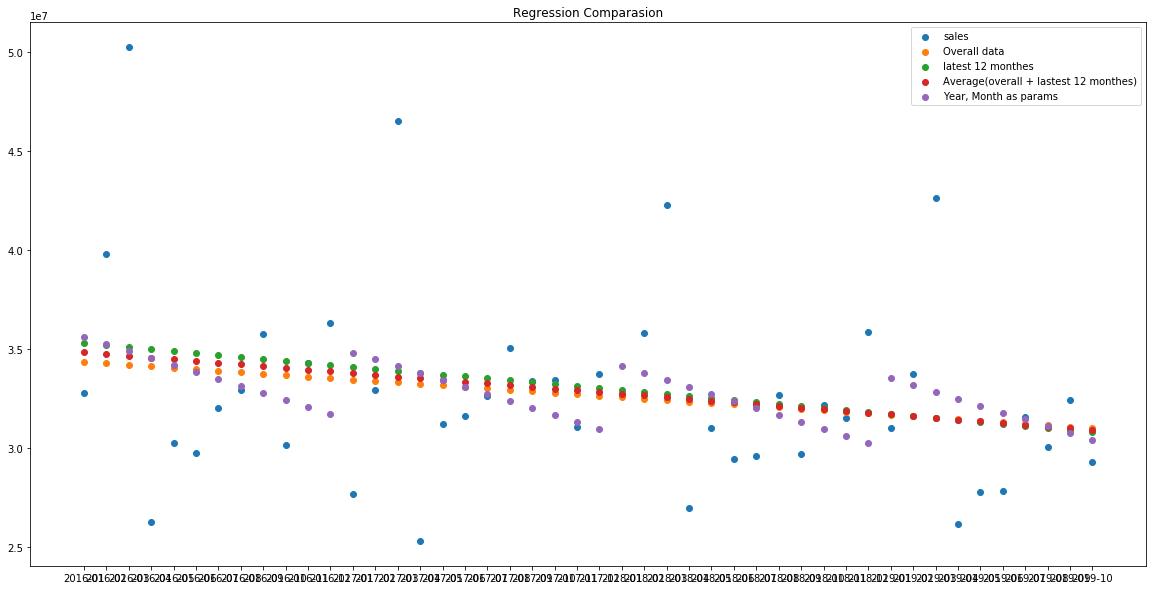

In [72]:
plt.figure(figsize=(20, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sales['sales'])

plt.scatter(sales['month'], predict_all(sales['month'].values), label='Overall data')
plt.scatter(sales['month'], predict_12(sales['month'].values), label="latest 12 monthes")
plt.scatter(sales['month'], predict_avg(sales['month'].values), label="Average(overall + lastest 12 monthes)")
#plt.scatter(sales['month'], predict_optimal(sales['month'].values), label="Average(overall) Optimal")

plt.scatter(sales['month'], predict_params(sales), label="Year, Month as params")
plt.legend()

## SVM 

In [73]:
svm_X_train = X_train.filter(['y', 'm']).values
svm_y_train = X_train.filter(['sales']).values

In [74]:
svm_X_test = X_test.filter(['y', 'm']).values

In [75]:
svm_X_test

array([[2017,    8],
       [2019,    9],
       [2016,    8],
       [2018,   11],
       [2018,    6],
       [2017,    6],
       [2017,   12],
       [2016,   12],
       [2016,    7],
       [2019,    6],
       [2016,   11],
       [2018,   10],
       [2019,    8],
       [2019,    1]])

In [76]:
np.log(X_test.filter(['y', 'm']).values)

array([[7.60936654, 2.07944154],
       [7.61035762, 2.19722458],
       [7.60887063, 2.07944154],
       [7.6098622 , 2.39789527],
       [7.6098622 , 1.79175947],
       [7.60936654, 1.79175947],
       [7.60936654, 2.48490665],
       [7.60887063, 2.48490665],
       [7.60887063, 1.94591015],
       [7.61035762, 1.79175947],
       [7.60887063, 2.39789527],
       [7.6098622 , 2.30258509],
       [7.61035762, 2.07944154],
       [7.61035762, 0.        ]])

In [77]:
y

array([30164746.83])

In [78]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
#clf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#clf = SVR(kernel='rbf', C=100, gamma=1e-8, degree=3, epsilon=.1,coef0=1)
#clf.fit(test, svm_y_train) 

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1, epsilon=.00001), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-1, 2, 10)})
#svm_X_train = np.log(svm_X_train)
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(svm_X_train)
y = sc_y.fit_transform(svm_y_train)

t0 = time.time()
svr.fit(x, y.flatten())
svr_fit = time.time() - t0



/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [85]:
def predict_svm(sales):
    X_train_new = sales.filter(['y', 'm'], axis=1).values
    #test = np.log(X_train_new)
    X_train_new = sc_x.fit_transform(X_train_new)
    p = svr.predict(X_train_new)
    return p.flatten()
    

In [80]:
def predict_svm_test(test_X):
    X_train_new = sc_x.fit_transform(test_X)
    p = svr.predict(X_train_new)
    return p.flatten()
    

In [81]:
sales['sales'].values

array([32759506.12, 39785722.81, 50276824.29, 26237321.88, 30250499.14,
       29749449.46, 32025318.8 , 32941641.3 , 35748878.52, 30164746.83,
       34274031.26, 36338915.55, 27674972.18, 32944442.35, 46506448.47,
       25293815.1 , 31236282.5 , 31634984.95, 32639539.85, 35068387.  ,
       33388983.08, 33412599.99, 31052163.06, 33745391.2 , 32715036.21,
       35836815.97, 42302378.31, 26955761.07, 31003964.24, 29423692.55,
       29607438.19, 32669211.58, 29689334.78, 32191406.21, 31534181.62,
       35871357.69, 31015035.47, 33741300.04, 42614918.15, 26149536.66,
       27770592.29, 27803166.03, 31583768.66, 30069055.14, 32447605.4 ,
       29274550.82])

/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/weiliang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


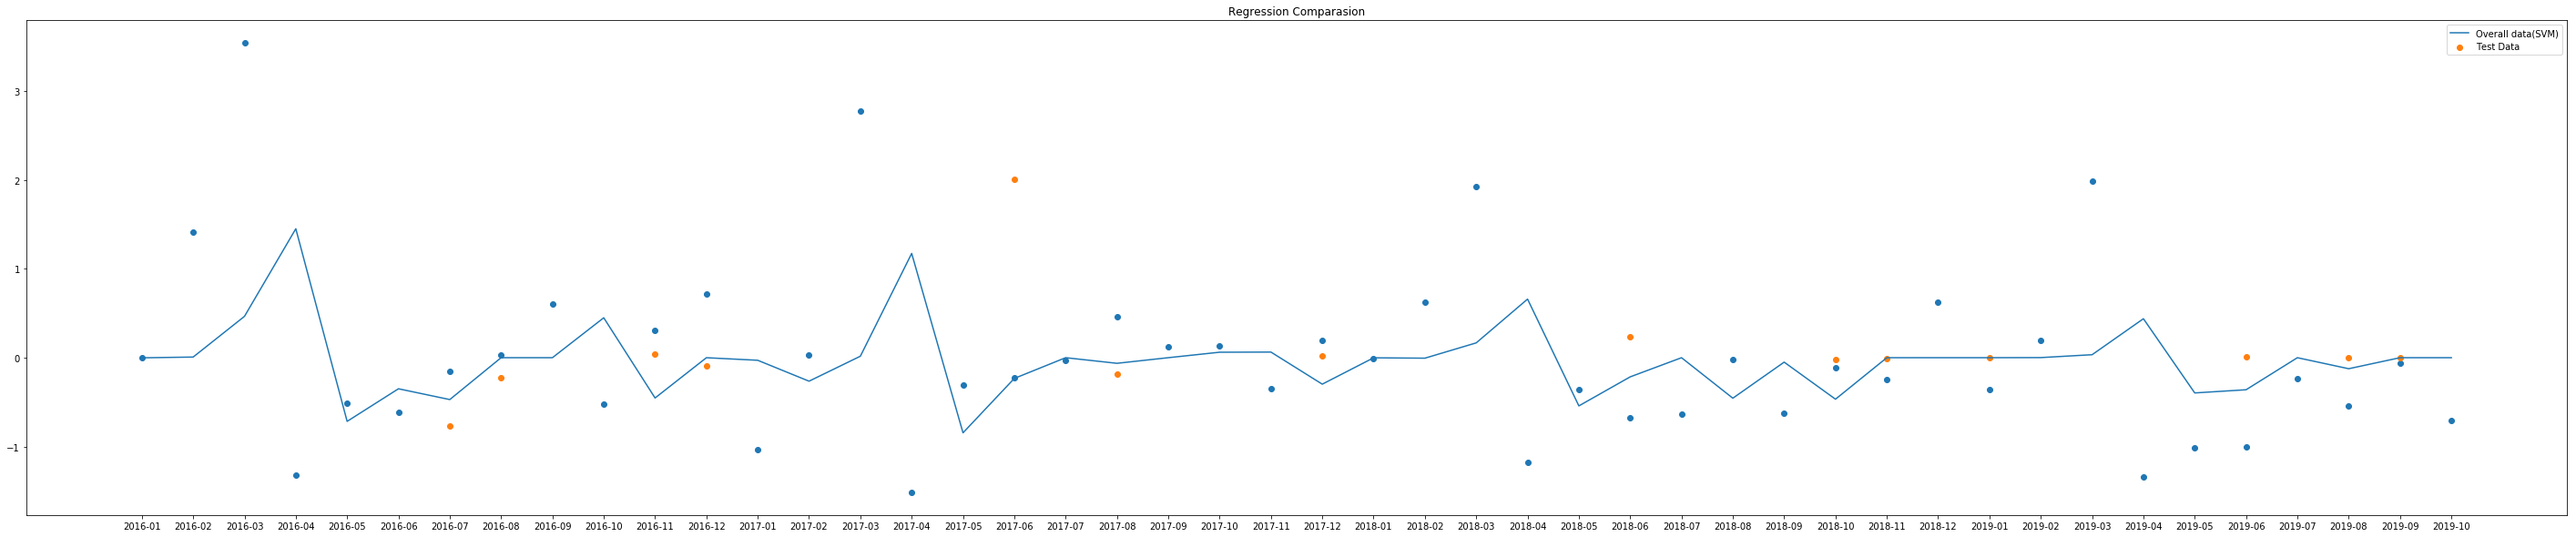

In [82]:
plt.figure(figsize=(50, 10))
plt.title("Regression Comparasion")
plt.scatter(sales['month'], sc_y.fit_transform(sales['sales'].values.reshape(-1,1)))
plt.plot(sales['month'], predict_svm(sales), label='Overall data(SVM)')
plt.scatter(X_test['month'], predict_svm_test(svm_X_test), label='Test Data')
plt.legend()

## KernelRidge


In [83]:
from sklearn.kernel_ridge import KernelRidge
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = KernelRidge(alpha=1.0)
clf.fit(X, y) 

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)